<a href="https://colab.research.google.com/github/krastegar/MachineLearningProjects/blob/main/Digital_digit_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Convolutional Neural Network with MNIST Dataset**

I am attempting to create a Convolutional Neural Networt to be able to classify digital images of handwritten digits. I also want to demonstrate that it is possible to open up the "black box" and see which images specifically does the model misclassify.  

In [ ]:
from distutils.command.build import build
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import BatchNormalization, Conv2D
from tensorflow.keras.layers import MaxPool2D, Activation, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# transform each image from 28 by28 to a 784 pixel vector
pixel_count = x_train.shape[1] * x_train.shape[2]
X_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
X_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# normalize inputs from gray scale of 0-255 to values between 0-1
X_train = x_train / 255
X_test = x_test / 255

# train/ val split
X_partial_train, X_val, y_partial_train, y_val = train_test_split(X_train, y_train, test_size=(1/6), random_state=42)

# reshape dataset to have a single channel
X_partial_train = X_partial_train.reshape((X_partial_train.shape[0], 28, 28, 1))
X_val = X_val.reshape((X_val.shape[0], 28, 28, 1))

# one-hot encode
y_partial_train = to_categorical(y_partial_train)
y_val = to_categorical(y_val)

In [ ]:
# building CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 batch_normalization_1 (Batc  (None, 100)              4

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
# Fitting the Data to the CNN
rlrp = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.1, patience = 5, verbose = 1, min_lr = 0.0001)
history = model.fit(X_partial_train, y_partial_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=1, shuffle=True, callbacks = rlrp)

Epoch 1/10
1563/1563 [==============================] - 20s 10ms/step - loss: 0.1353 - accuracy: 0.9602 - val_loss: 0.0771 - val_accuracy: 0.9757 - lr: 0.0100
Epoch 2/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.0544 - accuracy: 0.9838 - val_loss: 0.0523 - val_accuracy: 0.9849 - lr: 0.0100
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0332 - accuracy: 0.9898 - val_loss: 0.0484 - val_accuracy: 0.9861 - lr: 0.0100
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0206 - accuracy: 0.9938 - val_loss: 0.0539 - val_accuracy: 0.9845 - lr: 0.0100
Epoch 5/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.0150 - accuracy: 0.9956 - val_loss: 0.0467 - val_accuracy: 0.9862 - lr: 0.0100
Epoch 6/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.0110 - accuracy: 0.9967 - val_loss: 0.0437 - val_accuracy: 0.9884 - lr: 0.0100
Epoch 7/10
1563/1563 [=============================

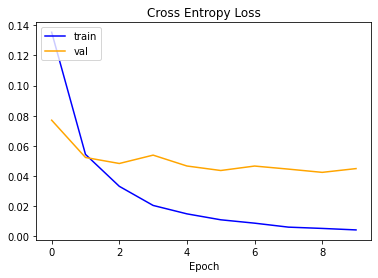

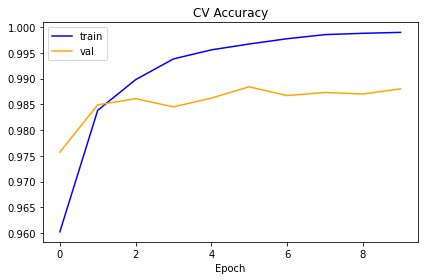

In [ ]:
# plot diagnostic learning curves
# plot loss
plt.figure()
plt.title('Cross Entropy Loss')
plt.xlabel("Epoch")       
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.legend(loc="upper left")
# plot accuracy
plt.figure()
plt.title('CV Accuracy')
plt.xlabel("Epoch")
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='val')
plt.legend(loc="upper left")
plt.tight_layout() # save images of validation process
plt.savefig('base_line.png', dpi=300)
plt.show()

Confusion matrix:
 [[ 977    1    0    0    0    0    1    1    0    0]
 [   0 1127    2    1    0    0    1    2    2    0]
 [   1    2 1019    1    1    0    0    5    2    1]
 [   0    0    2  999    0    2    0    1    5    1]
 [   0    0    1    0  967    0    2    2    1    9]
 [   1    0    1    3    0  884    3    0    0    0]
 [   6    3    1    0    1    2  941    0    4    0]
 [   0    2    7    2    0    0    0 1013    1    3]
 [   2    1    3    1    1    1    0    1  963    1]
 [   2    1    1    2    4    7    0    4    4  984]]


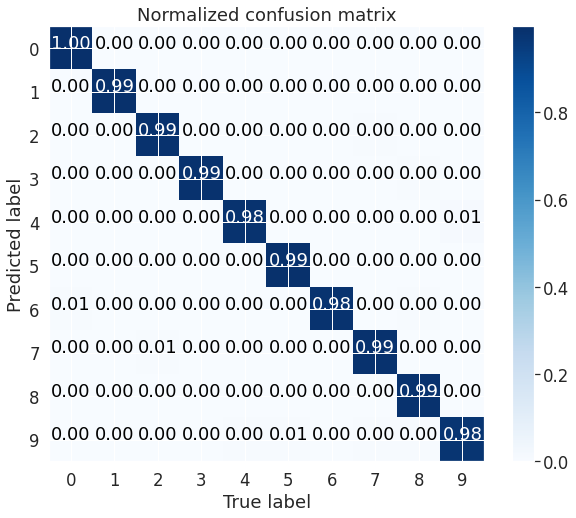

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.98      0.99      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale = 1.5)

from sklearn.metrics import confusion_matrix
import itertools

plt.figure(figsize = (10,8))

predicted_labels = model.predict(np.stack(X_test))
cm = confusion_matrix(y_test, np.argmax(predicted_labels, axis = 1))
print('Confusion matrix:\n',cm)

cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

plt.imshow(cm, cmap = plt.cm.Blues)
plt.title('Normalized confusion matrix')
plt.colorbar()
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.xticks(range(0, len(np.unique(y_test)))); plt.yticks(range(0, len(np.unique(y_test))))
plt.grid('off')
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'),
             horizontalalignment = 'center',
             color = 'white' if cm[i, j] > 0.5 else 'black')
plt.show()
class_rep = classification_report(y_test, np.argmax(predicted_labels, axis = 1))
print(class_rep)

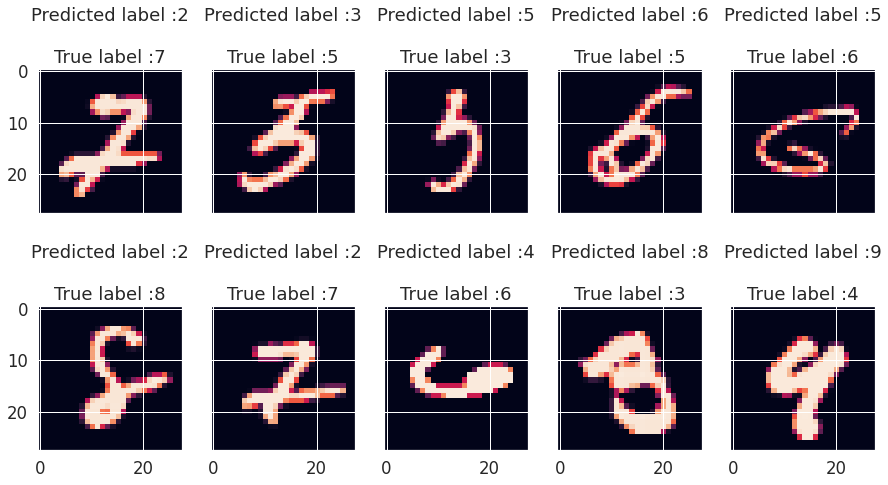

In [ ]:
# Display some error results 
Y_pred_classes = np.argmax(predicted_labels, axis=1)
Y_true = y_test
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = predicted_labels[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_test[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 5
    fig, ax = plt.subplots(nrows,ncols,figsize = (15,8),sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\n\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 10 errors 
most_important_errors = sorted_dela_errors[-10:]

# Show the top 10 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

**Summary**

As we can see from the top 10 errors produced from my CNN, the images that it misclassified were poorly drawn and sloppy. These mistakes are similar to mistakes that could have been made from a human.